## Vodafone Customer Churn Predictor

### 1. `Business Understanding`

##### 1.1 **Problem Statement:** Vodafone, a leading telecommunications provider, is struggling with customer retention in an increasingly competitive market. To maintain its market position and improve customer loyalty, Vodafone needs to understand why customers leave and predict potential churners. The company plans to leverage historical data and analytics to develop a predictive model that identifies at-risk customers and informs effective retention strategies.


##### 1.2 **Project Goal:** The goal of this project is to develop a predictive model using historical customer data and advanced analytics techniques to accurately identify customers at risk of churning. By doing so, the company aims to gain actionable insights into the factors driving customer churn using the datasets provided by the business team and implement targeted retention strategies to enhance customer loyalty and reduce churn rates.


##### 1.3 **Stakeholder:**
- Executive Leadership
- Business Team
- Data Science & Analytics Team
- Customer Service Team
- Sales Team


##### 1.4 **Key Metrics and Success Criteria:**
- Accuracy: The ratio of correctly predicted instances (both churn and non-churn) to the total instances.
    - Success Criteria: An accuracy rate of at least 85% indicates the model is reliably identifying churn and non-churn customers.

- Precision: The ratio of correctly predicted churn instances to the total predicted churn instances.
    - Success Criteria: A precision rate of at least 80% ensures that most customers identified as churners are indeed at risk, minimizing false positives.

- Recall: The ratio of correctly predicted churn instances to the total actual churn instances.
    - Success Criteria: A recall rate of at least 75% indicates that the model is effectively capturing a significant portion of actual churners, minimizing false negatives.

- F1 Score: The harmonic mean of precision and recall, providing a single metric that balances both.
    - Success Criteria: An F1 score of at least 80% ensures a good balance between precision and recall.

- Churn Rate: The percentage of customers who leave the company over a specific period.
    - Success Criteria: A decrease in the churn rate by at least 10% after implementing the churn prediction model.

- ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): Measures the model's ability to distinguish between churn and non-churn customers.
    - Success Criteria: An ROC-AUC score of at least 0.8 indicates strong discriminatory power.

- Baseline Models: There should be at least 4 Baseline Models

- Hyperparameter Tuning: Hypereparamter Tuning should only be applied to models that exceed their F1-score of 0.8


##### 1.5 **Features of the Dataset:**
1. CustomerID: Unique identifier for each customer.
2. Gender: Gender of the customer (Male/Female).
3. Senior Citizen: Indicates if the customer is a senior citizen (1: True, 0: False).
4. Partner: Indicates if the customer has a partner (Yes, No).
5. Dependents: Indicates if the customer has dependents (Yes, No).
6. Tenure: Number of months the customer has been with Vodafone.
7. Phone Service: Indicates if the customer has a phone service (Yes, No).
8. Multiple Lines: Indicates if the customer has multiple lines (Yes, No, No phone service).
9. Internet Service: Type of internet service the customer has (DSL, Fiber optic, No).
10. Online Security: Indicates if the customer has online security service (Yes, No, No internet service).
11. Online Backup: Indicates if the customer has online backup service (Yes, No, No internet service).
12. Device Protection: Indicates if the customer has device protection service (Yes, No, No internet service).
13. Tech Support: Indicates if the customer has tech support service (Yes, No, No internet service).
14. Streaming TV: Indicates if the customer has streaming TV service (Yes, No, No internet service).
15. Streaming Movies: Indicates if the customer has streaming movies service (Yes, No, No internet service).
16. Contract: Type of contract the customer has (Month-to-month, One year, Two year).
17. Paperless Billing: Indicates if the customer has paperless billing (Yes, No).
18. Payment Method: Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
19. Monthly Charges: The amount charged to the customer monthly.
20. Total Charges: The total amount charged to the customer.
21. Churn: Indicates if the customer has churned (Yes, No).

##### 1.6 **Hypothesis**

- 1.6.1 **Null Hypothesis(H0):** There is no significant relationship between customer churn and contract type, tenure, and monthly charges.

- 1.6.2 **Alternative Hypothesis(H1):** There is a significant relationship between customer churn and contract type, tenure, and monthly charges.


##### 1.7 **Analytical Questions:**
1. How does the distribution of contract types (month-to-month, one year, two years) affect the overall churn rate?
2. Is there a pattern in churn rate based on customer tenure? Are there specific points in the customer lifecycle where churn is more likely?
3. Do customers with higher monthly charges tend to churn more often? Are there any specific thresholds where churn increases significantly?
4. Does the preferred payment method influence churn rate? Are certain payment methods associated with higher churn?
5. Are there demographic factors (like senior citizen status, gender, having a partner, or having dependents) that correlate with higher churn rates?


### 2. `Data Understanding`

##### 2.1 **Importations**

In [85]:
# Data Manipulation Packages

import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import openpyxl

warnings.filterwarnings('ignore')

# Machine Learning Packages
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, ConfusionMatrixDisplay, make_scorer, log_loss
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.linear_model import Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.utils import estimator_html_repr
from sklearn.experimental import enable_halving_search_cv  # This enables HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, make_scorer, mean_squared_error, mean_absolute_error
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from IPython.display import display, HTML
import joblib
import json
import os
import pickle


##### 2.2 **Load Datasets**

In [2]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials from .env file
database = environment_variables.get("database")
server = environment_variables.get("server")
user = environment_variables.get("user")
password = environment_variables.get("password")
 
# create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={user};PWD={password}"

In [3]:
# Using the connect method of the pyodbc library to pass in the connection string
connection = pyodbc.connect(connection_string)

# what tables are in the Database
db_query = '''SELECT *
FROM INDIVIDUAL_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE'''

- 2.2.1 **Telco_churn_first_3000**

In [4]:
# Querying the Database to determine the tables we are to use for analysis and modelling
query1 = "Select * from dbo.LP2_Telco_churn_first_3000"

voda1 = pd.read_sql(query1, connection)
voda1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


- 2.2.2 **Telco_churn_second_2000**

In [5]:
# File path for the 2nd dataset for analysis and modelling
file_path1 = '../data/LP2_Telco-churn-second-2000.csv'

# Load the file into the notebook
voda2 = pd.read_csv(file_path1)
voda2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


- 2.2.3 **Telco_churn_last_2000 (Test Data)**

In [6]:
# File path for the test dataset for modelling
file_path2 = '../data/LP2_Telco-churn-last-2000 - Testing Dataset.xlsx'

# Load the file into the notebook
voda_test = pd.read_excel(file_path2)
voda_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


##### 2.3 **Expolatory Data Analysis (EDA)** 

- 2.3.1 **Data Quality Assessment & Exploring data**

In [7]:
voda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
# Exclude CustomerID and Gender (assuming no spaces in column names)
exclude_fields = ['customerID']
desired_fields = [col for col in voda1.columns if col not in exclude_fields]

# Iterate through desired fields and display unique values with counts
for field in desired_fields:
    unique_values = voda1[field].value_counts()
    print(f"Unique values in '{field}':")
    print(unique_values)
    print("-" * 30)  # Optional separator between fields

Unique values in 'gender':
gender
Male      1537
Female    1463
Name: count, dtype: int64
------------------------------
Unique values in 'SeniorCitizen':
SeniorCitizen
False    2525
True      475
Name: count, dtype: int64
------------------------------
Unique values in 'Partner':
Partner
False    1538
True     1462
Name: count, dtype: int64
------------------------------
Unique values in 'Dependents':
Dependents
False    2070
True      930
Name: count, dtype: int64
------------------------------
Unique values in 'tenure':
tenure
1     257
72    167
2     107
3      85
71     80
     ... 
55     21
39     20
36     18
44     17
0       5
Name: count, Length: 73, dtype: int64
------------------------------
Unique values in 'PhoneService':
PhoneService
True     2731
False     269
Name: count, dtype: int64
------------------------------
Unique values in 'MultipleLines':
MultipleLines
False    1437
True     1294
Name: count, dtype: int64
------------------------------
Unique values in 'Int

In [9]:
voda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [10]:
voda_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [11]:
# Renaming columns to align properly with other columns

voda1.rename(columns = {
    'customerID': 'CustomerID',
    'gender': 'Gender',
    'tenure': 'Tenure'
}, inplace = True)

voda2.rename(columns = {
    'customerID': 'CustomerID',
    'gender': 'Gender',
    'tenure': 'Tenure'
}, inplace = True)

In [12]:
# Regularizing each fields of both Datasets by ensuring all Datatypes align correctly and ensuring that all values in each rows are consistent

voda2['TotalCharges'] = pd.to_numeric(voda2['TotalCharges'], errors='coerce') # Changing from'object'dtype to 'float' dtype
voda_test['TotalCharges'] = pd.to_numeric(voda_test['TotalCharges'], errors='coerce') # Changing from'object'dtype to 'float' dtype for test data
voda1['MonthlyCharges'] = voda1['MonthlyCharges'].apply(lambda x: round(x, 2)) # Rounding up each value of the field from 6 decimal places to 2 decimal places
voda1['TotalCharges'] = voda1['TotalCharges'].apply(lambda x: round(x, 2)) # Rounding up each value of the field from 6 decimal places to 2 decimal places

voda1['SeniorCitizen'] = voda1['SeniorCitizen'].astype(int) # Convert SeniorCitizen to integer (0 for False, 1 for True)

# Convert SeniorCitizen to int64
voda1['SeniorCitizen'] = voda1['SeniorCitizen'].astype('int64')

In [13]:
# Mapping dictionary for conversion from boolean dtype to object dtype
mapping1 = {True: 'Yes', False: 'No'}

# Apply mapping to the following columns in voda1
voda1['Partner'] = voda1['Partner'].replace(mapping1)
voda1['Dependents'] = voda1['Dependents'].replace(mapping1)
voda1['PhoneService'] = voda1['PhoneService'].replace(mapping1)
voda1['PaperlessBilling'] = voda1['PaperlessBilling'].replace(mapping1)

# Mapping dictionary for conversion from object dtype ('True', 'False' and 'None') to object dtype ('Yes', 'No' and 'No phone service')
mapping2 = {True: 'Yes', False: 'No'}

# Apply mapping function for Yes/No conversion
def convert_yes_no(value):
  if value in mapping2:
    return mapping2[value]
  else:
    return value

# Replace values with strings for clarity
voda1['MultipleLines'] = voda1['MultipleLines'].replace(mapping2)

# Set None values to "No phone service"
voda1.loc[voda1['MultipleLines'].isna(), 'MultipleLines'] = 'No phone service'

In [14]:
# Mapping dictionary for conversion from object dtype ('True', 'False' and 'None') to object dtype ('Yes', 'No' and 'No internet service')
mapping3 = {True: 'Yes', False: 'No'}

# Apply mapping function for Yes/No conversion
def convert_yes_no(value):
  if value in mapping3:
    return mapping3[value]
  else:
    return value

# Replace values with strings for clarity
voda1['OnlineSecurity'] = voda1['OnlineSecurity'].replace(mapping3)
voda1['OnlineBackup'] = voda1['OnlineBackup'].replace(mapping3)
voda1['DeviceProtection'] = voda1['DeviceProtection'].replace(mapping3)
voda1['TechSupport'] = voda1['TechSupport'].replace(mapping3)
voda1['StreamingTV'] = voda1['StreamingTV'].replace(mapping3)
voda1['StreamingMovies'] = voda1['StreamingMovies'].replace(mapping3)


# Set None values to "No internet service"
voda1.loc[voda1['OnlineSecurity'].isna(), 'OnlineSecurity'] = 'No internet service'
voda1.loc[voda1['OnlineBackup'].isna(), 'OnlineBackup'] = 'No internet service'
voda1.loc[voda1['DeviceProtection'].isna(), 'DeviceProtection'] = 'No internet service'
voda1.loc[voda1['TechSupport'].isna(), 'TechSupport'] = 'No internet service'
voda1.loc[voda1['StreamingTV'].isna(), 'StreamingTV'] = 'No internet service'
voda1.loc[voda1['StreamingMovies'].isna(), 'StreamingMovies'] = 'No internet service'


# Mapping dictionary for conversion from object dtype ('True', 'False' and 'None') to object dtype ('Yes', 'No' and 'NaN')
mapping4 = {True: 'Yes', False: 'No'}

# Apply mapping function for Yes/No conversion
def convert_yes_no(value):
  if value in mapping4:
    return mapping4[value]
  else:
    return value

# Replace values with strings for clarity
voda1['Churn'] = voda1['Churn'].replace(mapping4)

# Set None values to "No"
voda1.loc[voda1['Churn'].isna(), 'Churn'] = 'No'

In [15]:
voda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3000 non-null   object 
 1   Gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   Tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [16]:
voda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2043 non-null   object 
 1   Gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   Tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [17]:
voda_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [90]:
# Renaming columns to align properly with other columns

voda_test.rename(columns = {
    'customerID': 'CustomerID',
    'gender': 'Gender',
    'tenure': 'Tenure'
}, inplace = True)

In [18]:
# Merging the 2 datasets together

voda_merged = pd.concat([voda1, voda2], ignore_index = True)
voda_merged.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
voda_merged.tail()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [20]:
voda_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5043 non-null   object 
 1   Gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   Tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [21]:
voda_merged.shape, voda_test.shape

((5043, 21), (2000, 20))

In [22]:
# Find duplicate rows (considering all columns)
duplicates = voda_merged.duplicated()

In [23]:
# Exclude CustomerID and Gender (assuming no spaces in column names)
exclude_fields1 = ['CustomerID']
desired_fields1 = [col for col in voda_merged.columns if col not in exclude_fields1]

# Iterate through desired fields and display unique values with counts
for fields in desired_fields1:
    unique_values1 = voda_merged[fields].value_counts()
    print(f"Unique values in '{fields}':")
    print(unique_values1)
    print("-" * 30)  # Optional separator between fields

Unique values in 'Gender':
Gender
Male      2559
Female    2484
Name: count, dtype: int64
------------------------------
Unique values in 'SeniorCitizen':
SeniorCitizen
0    4224
1     819
Name: count, dtype: int64
------------------------------
Unique values in 'Partner':
Partner
No     2585
Yes    2458
Name: count, dtype: int64
------------------------------
Unique values in 'Dependents':
Dependents
No     3482
Yes    1561
Name: count, dtype: int64
------------------------------
Unique values in 'Tenure':
Tenure
1     434
72    257
2     167
3     144
71    124
     ... 
39     40
28     39
44     36
36     34
0       8
Name: count, Length: 73, dtype: int64
------------------------------
Unique values in 'PhoneService':
PhoneService
Yes    4554
No      489
Name: count, dtype: int64
------------------------------
Unique values in 'MultipleLines':
MultipleLines
No                  2424
Yes                 2130
No phone service     489
Name: count, dtype: int64
-------------------------

In [24]:
voda_merged.nunique()

CustomerID          5043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1456
TotalCharges        4770
Churn                  2
dtype: int64

In [25]:
voda_merged.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [26]:
# Replacing the 'No phone service' and 'No internet service' to 'No' in the affected columns
# Define the replacement dictionary
replacements = {
    'MultipleLines': {'No phone service': 'No'},
    'OnlineSecurity': {'No internet service': 'No'},
    'OnlineBackup': {'No internet service': 'No'},
    'DeviceProtection': {'No internet service': 'No'},
    'TechSupport': {'No internet service': 'No'},
    'StreamingTV': {'No internet service': 'No'},
    'StreamingMovies': {'No internet service': 'No'}
}

# Apply replacements using dictionary comprehension
voda_merged = voda_merged.replace(replacements)

In [27]:
voda_merged.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043.0,NaN,NaN,NaN,0.162403,0.368857,0.0,0.0,0.0,0.0,1.0
Partner,5043,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,No,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,Yes,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5043,2,No,2913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5043,2,No,3587,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Impute missing values in 'TotalCharges' with the median
voda_merged['TotalCharges'] = voda_merged['TotalCharges'].fillna(voda_merged['TotalCharges'].median())

In [29]:
# Checking for null values again
voda_merged.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
# Separating Numerical and categorical variables for easy analysis and EDA

cat_cols = voda_merged.select_dtypes(include=['object', 'bool']).columns
num_cols = voda_merged.select_dtypes(include = ['number']).columns.tolist()

print("Categorical Variables:")
print(cat_cols)

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['CustomerID', 'Gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']


In [32]:
# Saving the voda_merged Dataframe as a CSV file for POWERBI visualization
voda_merged.to_csv('C:/Users/HP/AzubiCA/Career Accelerator/LP2/Customer-Churn-Prediction-Vodafone-Corporation-/data/voda_merged.csv', index = False)

- 2.3.3 **Univariate Analysis**

SeniorCitizen
Skew : 1.83


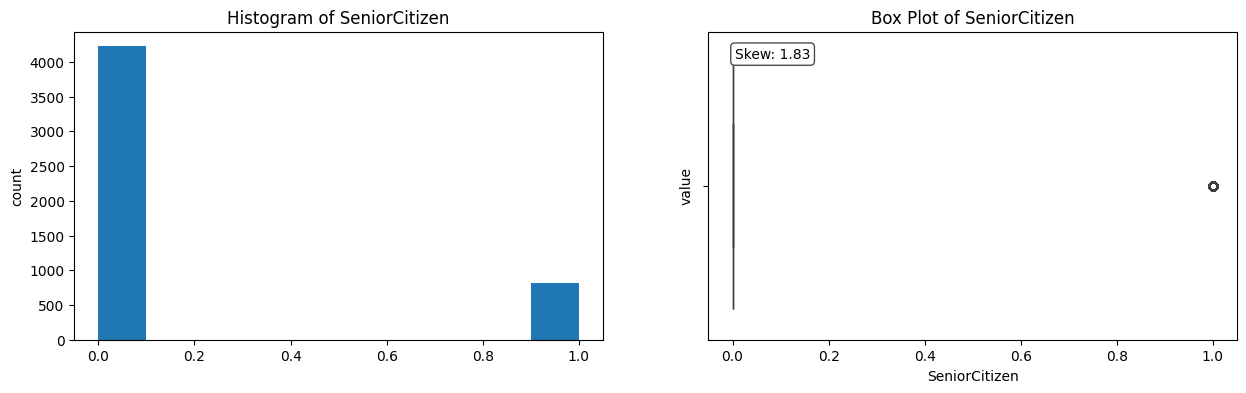

Tenure
Skew : 0.23


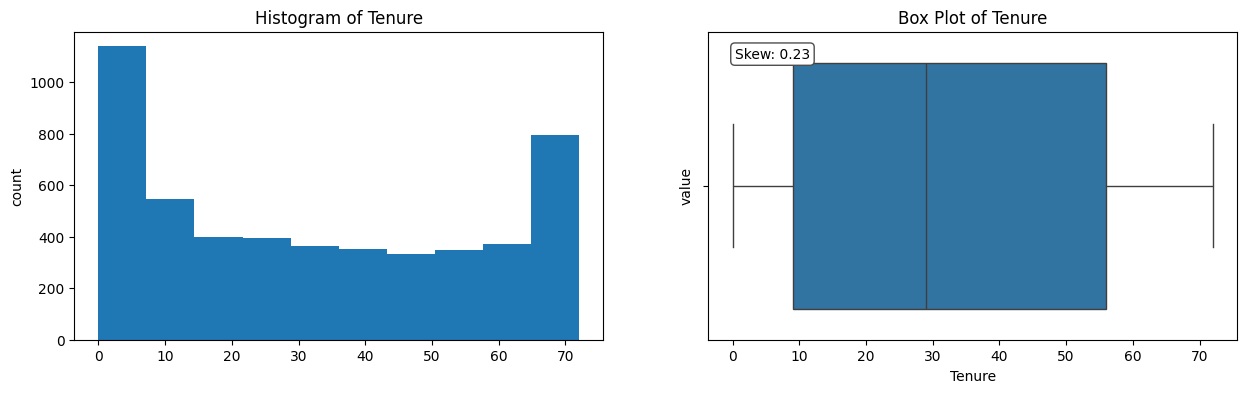

MonthlyCharges
Skew : -0.24


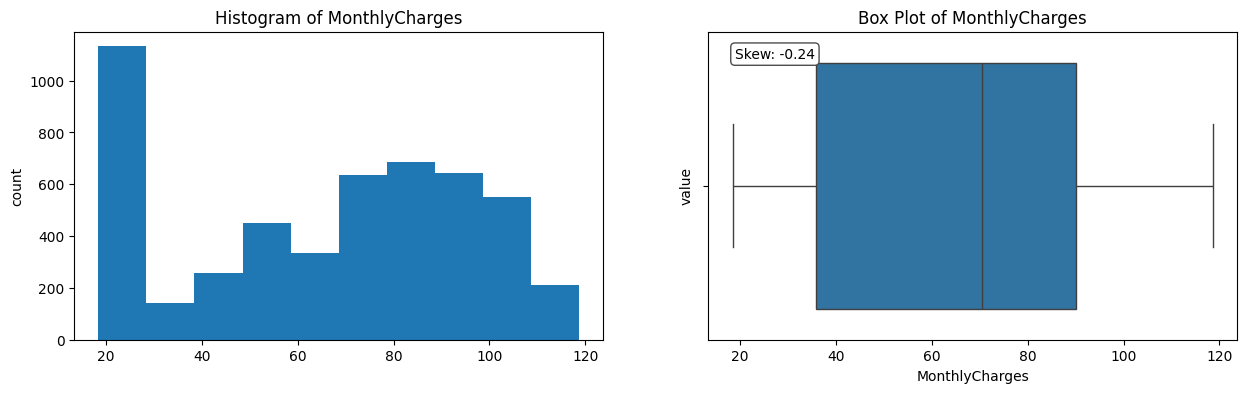

TotalCharges
Skew : 0.95


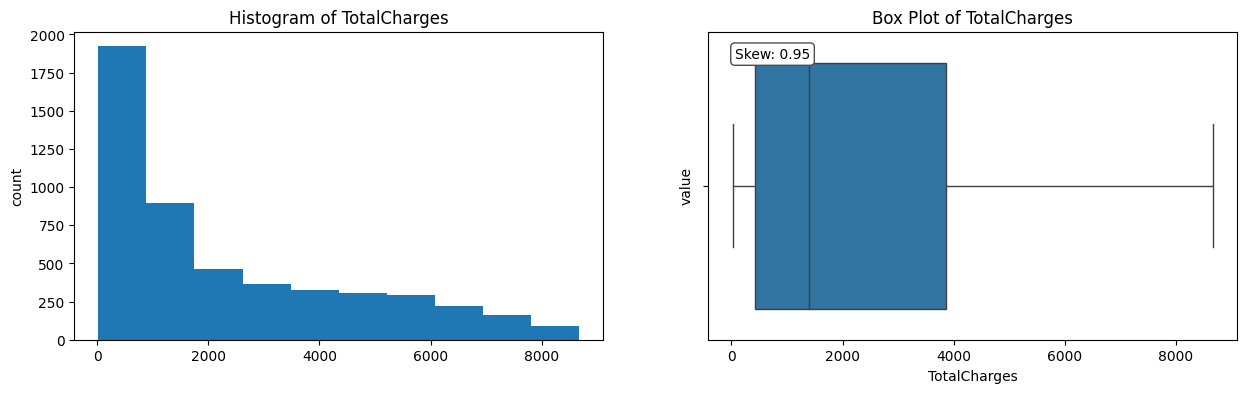

In [33]:
# Univariate analysis for the 4 numerical columns

for col in num_cols:
  # Print column name and skewness
  print(col)
  skewness = round(voda_merged[col].skew(), 2)
  print(f'Skew : {skewness}')

  # Create the figure and subplots
  plt.figure(figsize = (15, 4))
  plt.subplot(1, 2, 1)

  # Histogram
  voda_merged[col].hist(grid = False)
  plt.ylabel('count')
  plt.title(f'Histogram of {col}')  # Add title to histogram

  # Subplot for boxplot with skewness indicator
  plt.subplot(1, 2, 2)
  sns.boxplot(x = voda_merged[col])
  plt.ylabel('value')
  plt.title(f'Box Plot of {col}')  # Add title to boxplot

  # Add a text annotation to show skewness value on the boxplot
  ax = plt.gca()  # Get the current axes
  props = dict(boxstyle = "round", facecolor = "white", edgecolor = "0.3")
  text_skewness = f"Skew: {skewness}"
  ax.text(0.05, 0.95, text_skewness, transform = ax.transAxes, fontsize = 10, verticalalignment = "top", bbox = props)

  plt.show()

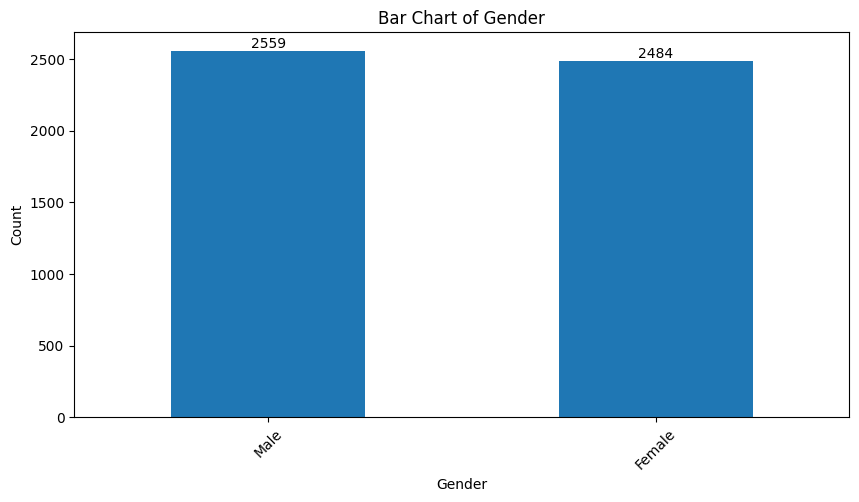

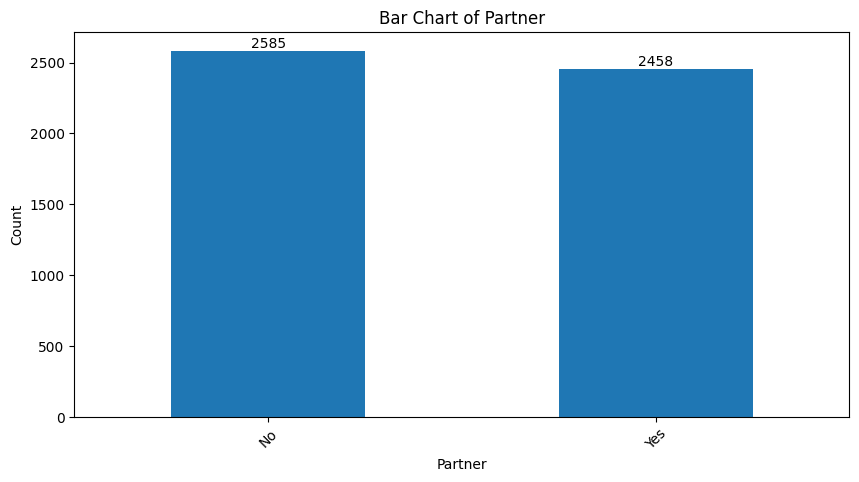

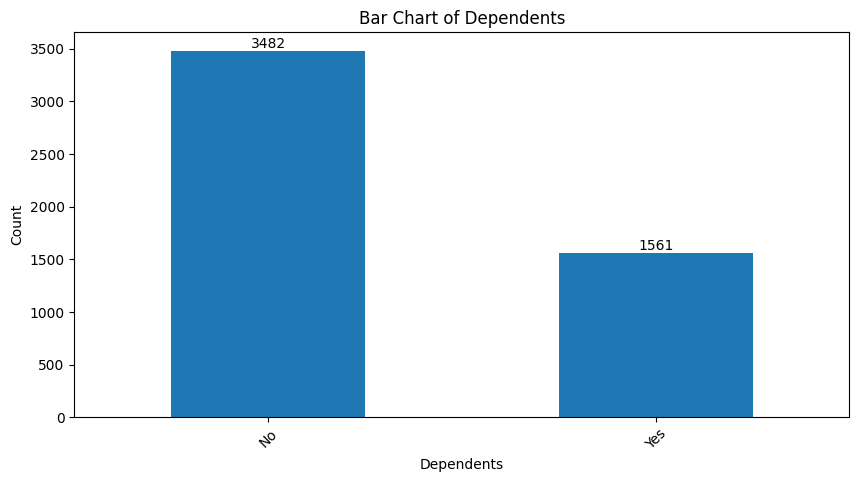

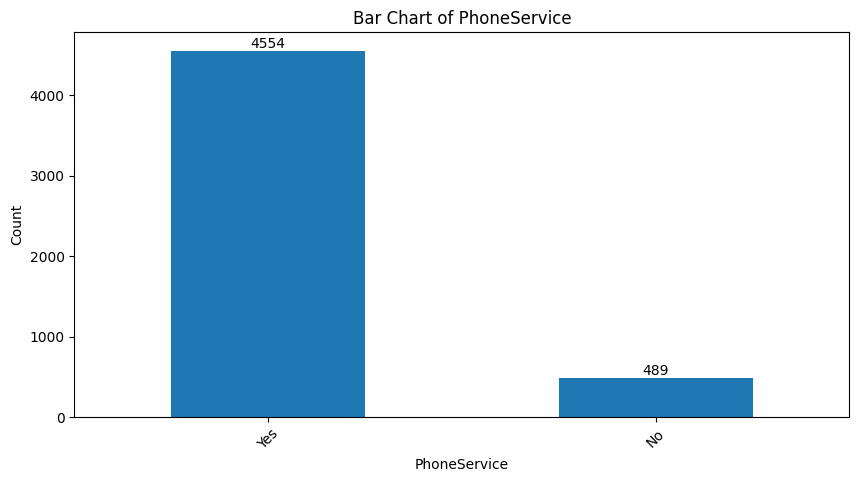

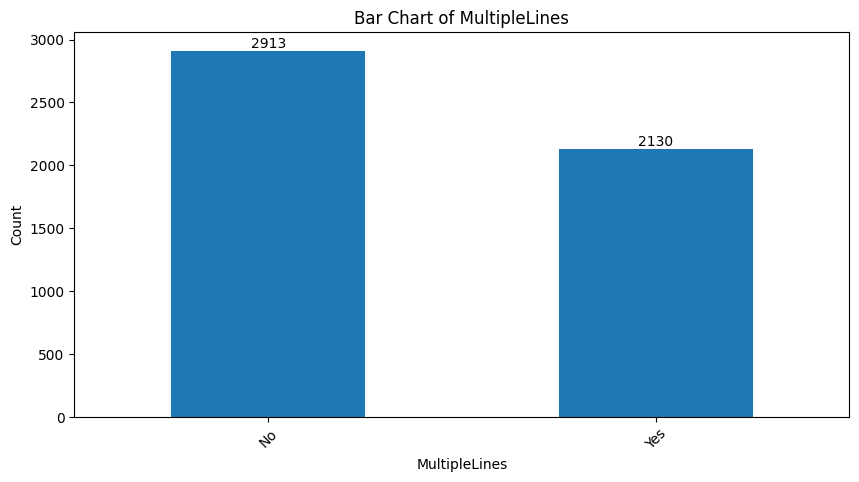

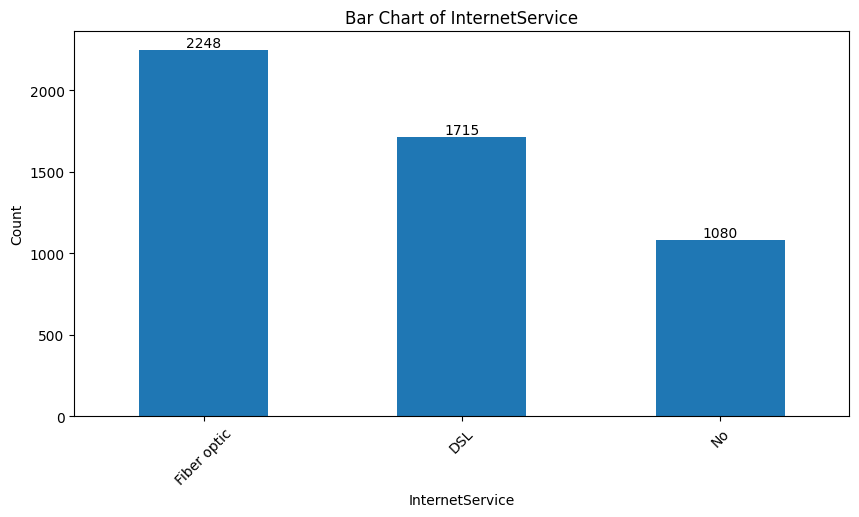

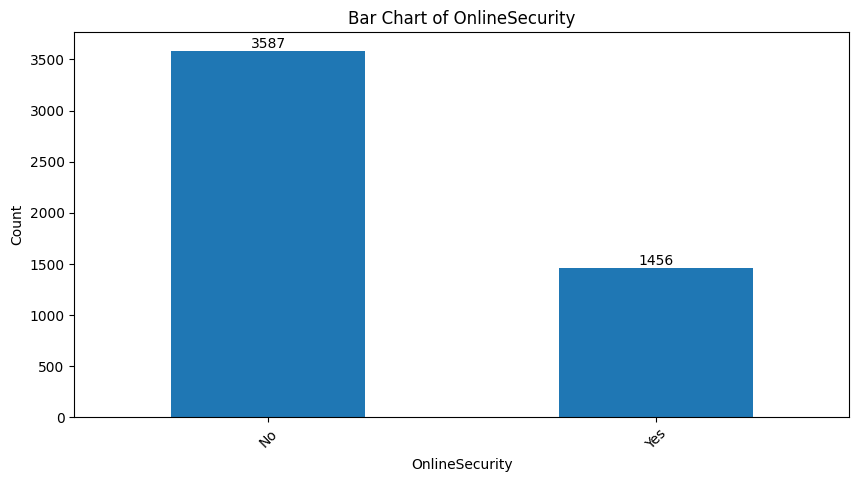

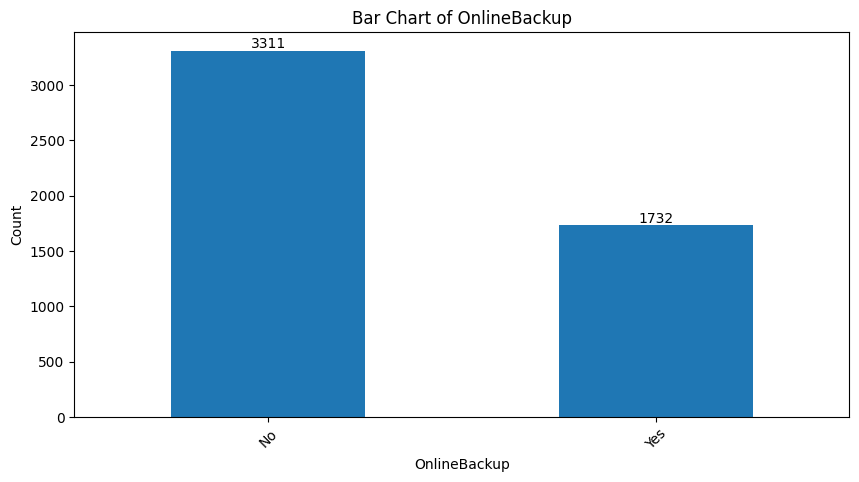

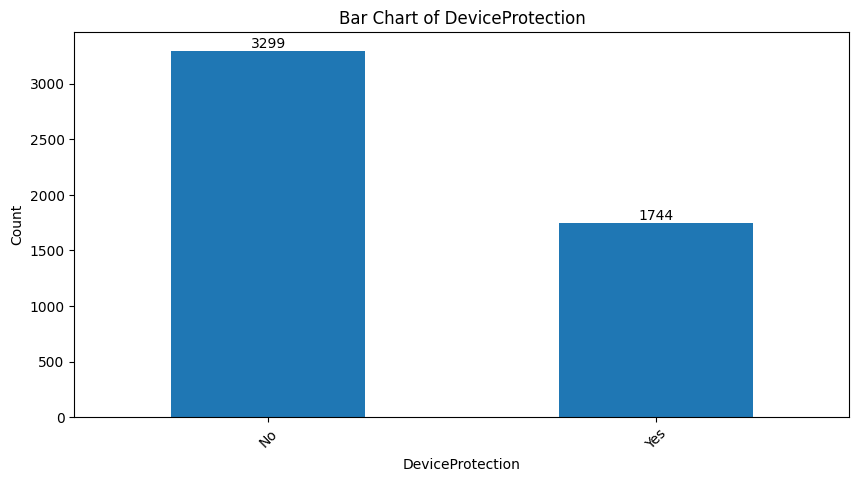

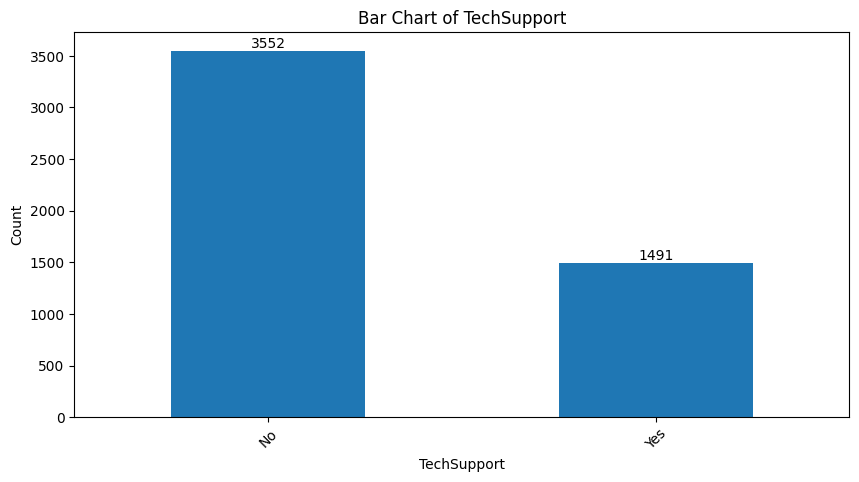

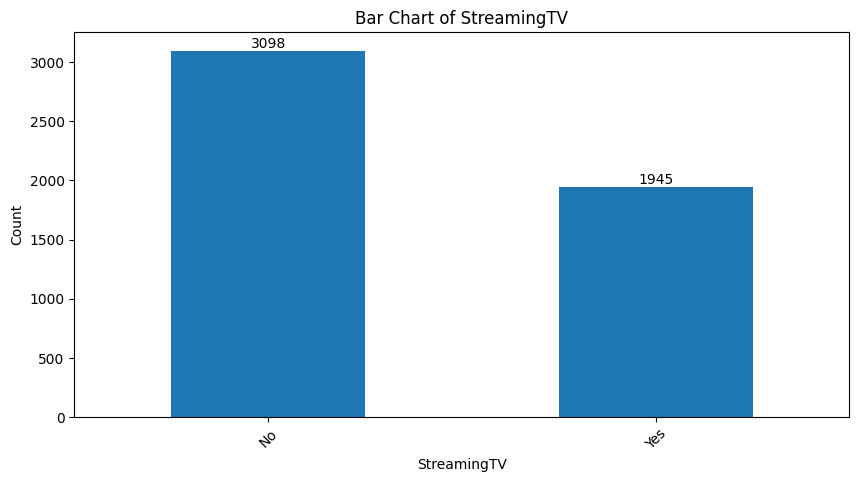

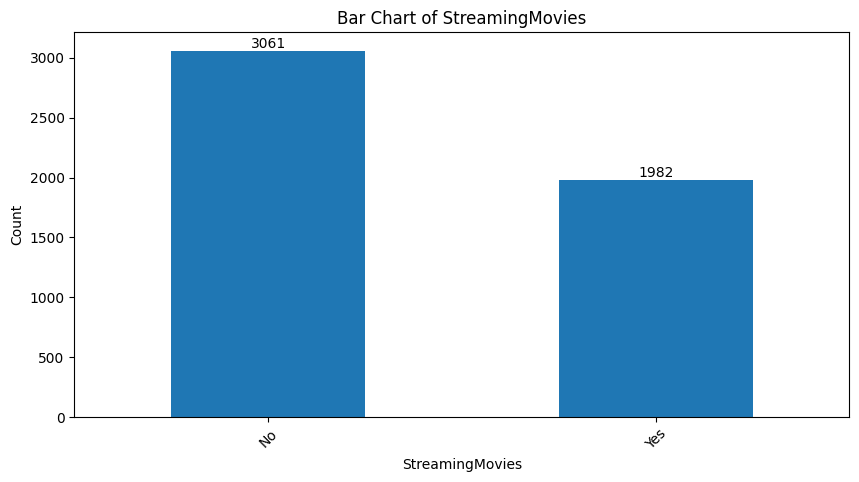

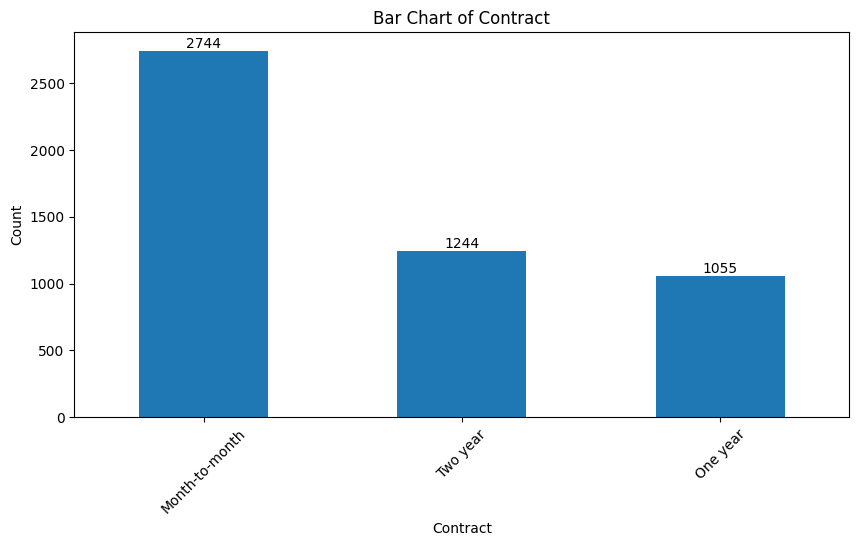

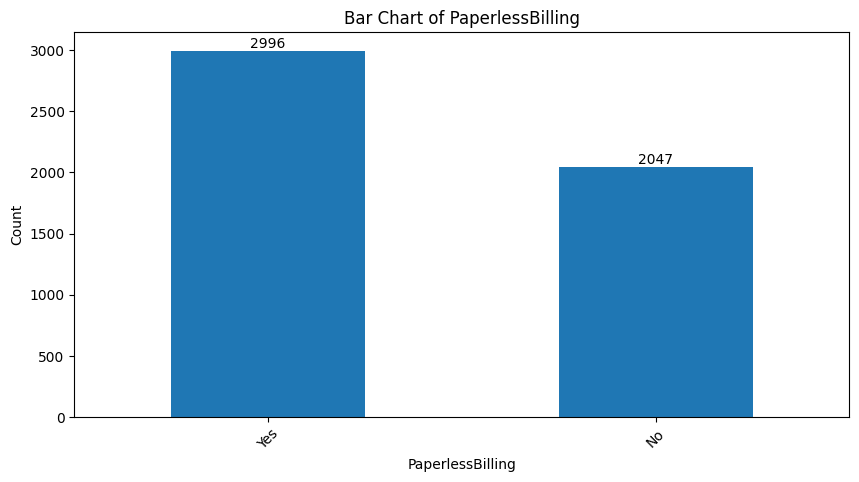

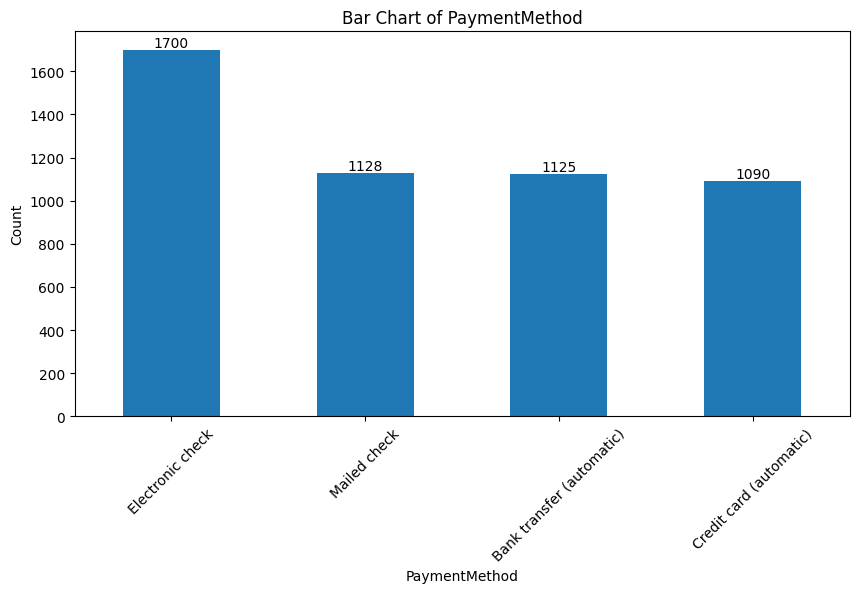

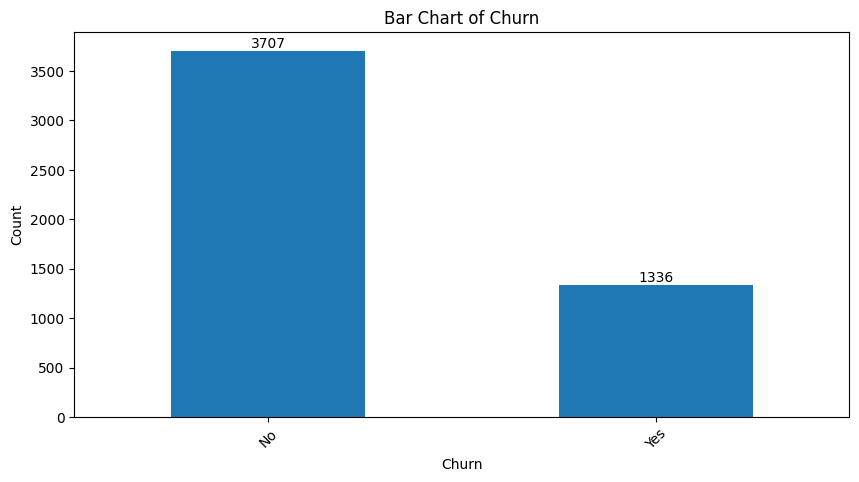

In [34]:
# Exclude customerID (assuming no spaces in the column name)
exclude_cols = ['CustomerID']
categorical_columns = [col for col in voda_merged.columns if col not in exclude_cols and not pd.api.types.is_numeric_dtype(voda_merged[col])]

# Check if there are any categorical features (excluding customerID)
if not categorical_columns:
  print("No categorical features found (excluding customerID).")
else:
  for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    counts = voda_merged[column].value_counts()  # Get value counts

    # Create bar chart
    bars = counts.plot(kind='bar')

    # Annotate each bar with its count
    for bar, count in zip(bars.containers[0], counts):
      x = bar.get_x() + bar.get_width() / 2  # X-coordinate for text placement
      y = count  # Y-coordinate is the count itself
      plt.text(x, y, str(count), ha='center', va='bottom')  # Text placement and alignment

    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

- 2.3.3 **Bi-variate Analysis**

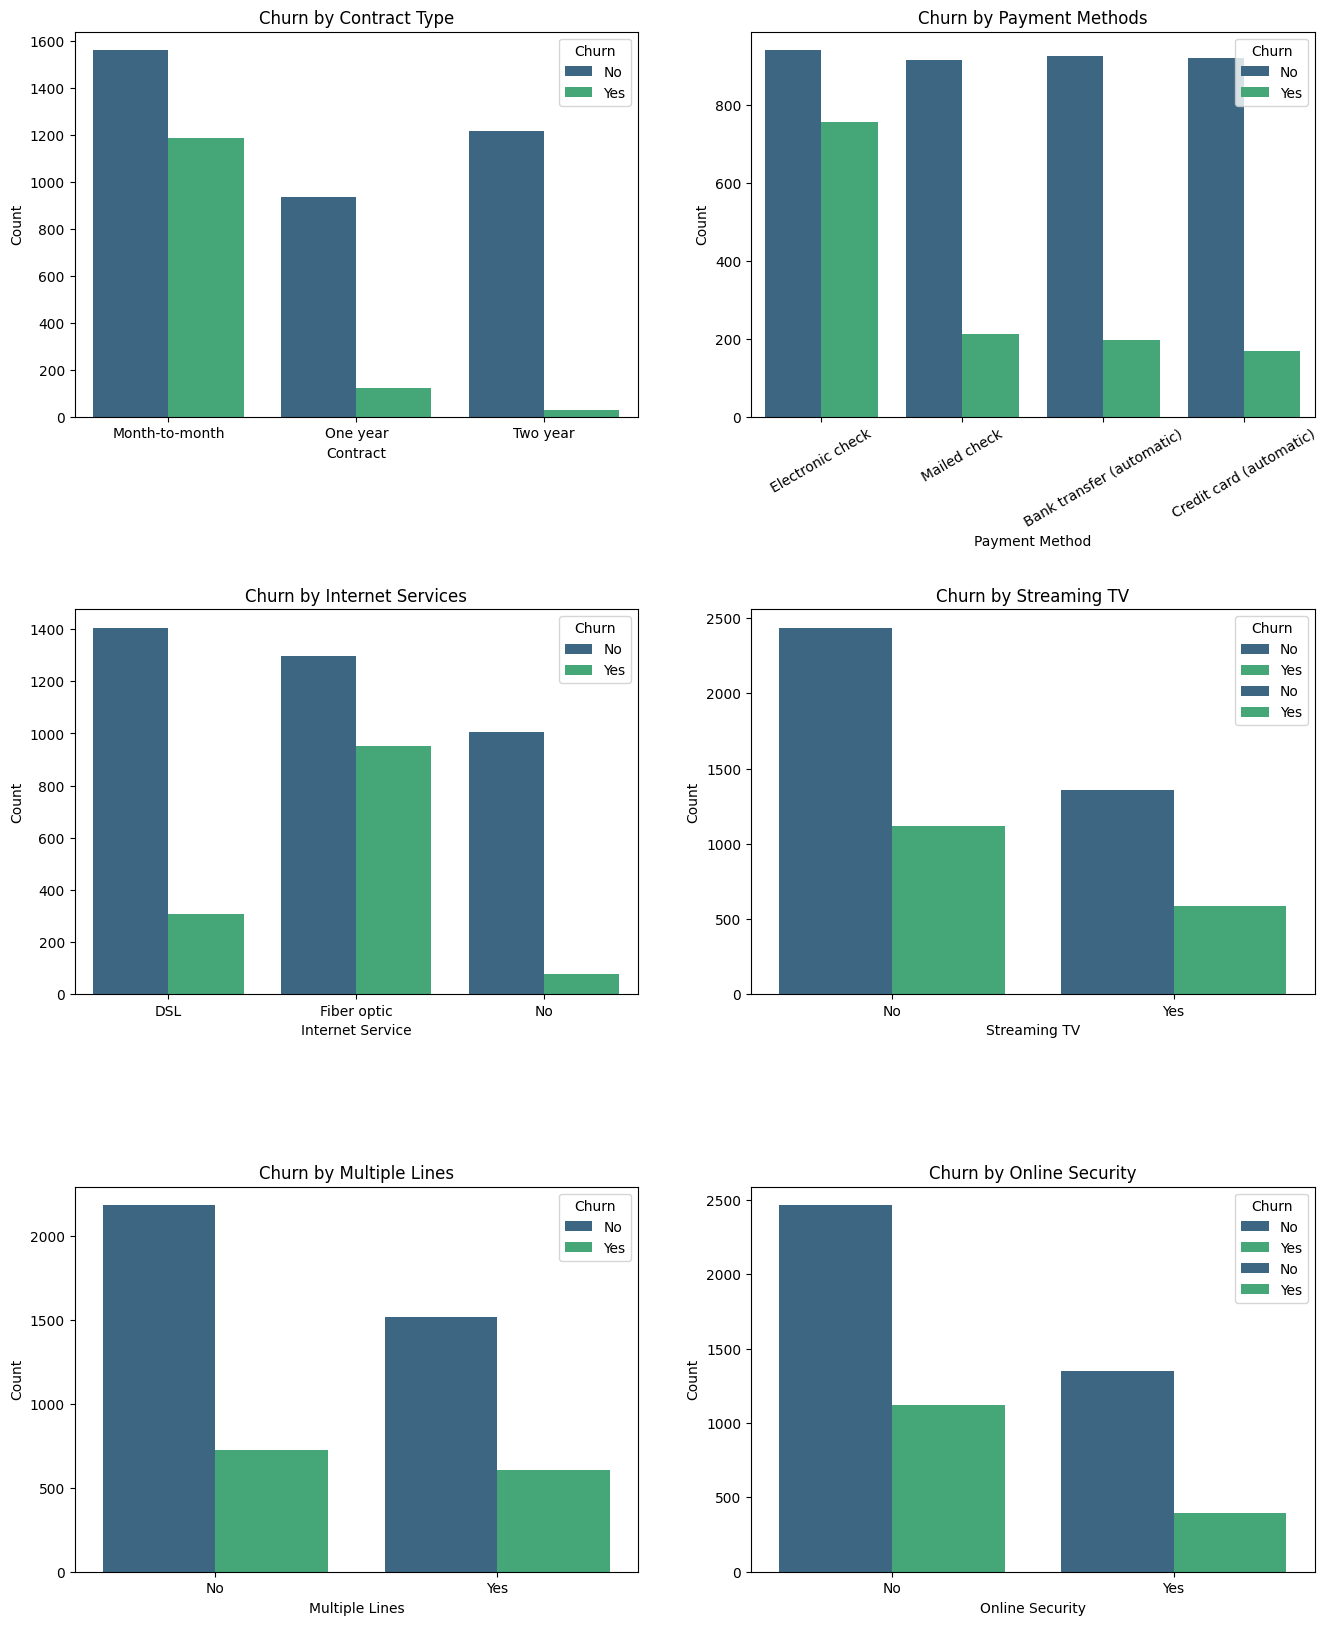

In [35]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 20))
plt.subplots_adjust(hspace = 0.5)

# Contract vs Churn
sns.countplot(ax=axes[0, 0], x ='Contract', hue ='Churn', data = voda_merged, palette ='viridis')
axes[0, 0].set_title('Churn by Contract Type')
axes[0, 0].set_xlabel('Contract')
axes[0, 0].set_ylabel('Count')

# PaymentMethod vs Churn
sns.countplot(ax=axes[0, 1], x ='PaymentMethod', hue='Churn', data = voda_merged, palette ='viridis')
axes[0, 1].set_title('Churn by Payment Methods')
axes[0, 1].set_xlabel('Payment Method')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=30)

# InternetService vs Churn
sns.countplot(ax=axes[1, 0], x ='InternetService', hue ='Churn', data = voda_merged, palette ='viridis')
axes[1, 0].set_title('Churn by Internet Services')
axes[1, 0].set_xlabel('Internet Service')
axes[1, 0].set_ylabel('Count')

# TechSupport vs Churn
sns.countplot(ax=axes[1, 1], x ='TechSupport', hue ='Churn', data = voda_merged, palette ='viridis')
axes[1, 1].set_title('Churn by Tech Support')
axes[1, 1].set_xlabel('Tech Support')
axes[1, 1].set_ylabel('Count')

# MultipleLines vs Churn
sns.countplot(ax=axes[2, 0], x ='MultipleLines', hue ='Churn', data = voda_merged, palette ='viridis')
axes[2, 0].set_title('Churn by Multiple Lines')
axes[2, 0].set_xlabel('Multiple Lines')
axes[2, 0].set_ylabel('Count')

# DeviceProtection vs Churn
sns.countplot(ax=axes[2, 1], x ='DeviceProtection', hue ='Churn', data = voda_merged, palette ='viridis')
axes[2, 1].set_title('Churn by Device Protection')
axes[2, 1].set_xlabel('Device Protection')
axes[2, 1].set_ylabel('Count')

# StreamingTV vs Churn
sns.countplot(ax=axes[1, 1], x ='StreamingTV', hue ='Churn', data = voda_merged, palette ='viridis')
axes[1, 1].set_title('Churn by Streaming TV')
axes[1, 1].set_xlabel('Streaming TV')
axes[1, 1].set_ylabel('Count')

# OnlineSecurity vs Churn
sns.countplot(ax=axes[2, 1], x ='OnlineSecurity', hue ='Churn', data = voda_merged, palette ='viridis')
axes[2, 1].set_title('Churn by Online Security')
axes[2, 1].set_xlabel('Online Security')
axes[2, 1].set_ylabel('Count')

plt.show()

- 2.3.4 **Multivariate Analysis**

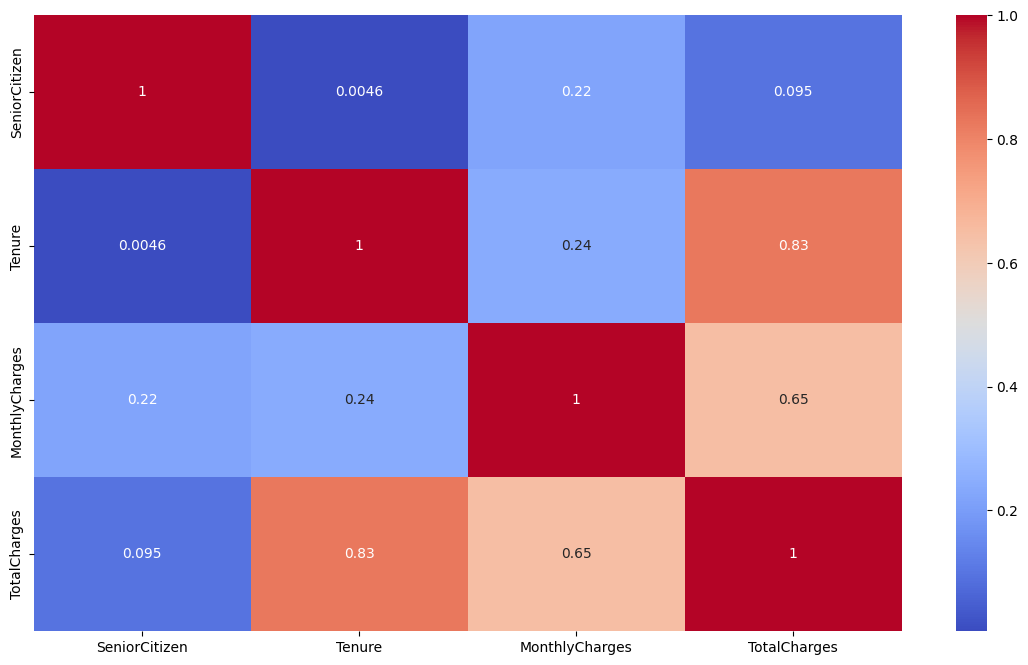

In [36]:
# Select only numeric columns
numeric_cols = voda_merged.select_dtypes(include=['number']).columns
numeric_data = voda_merged[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize = (14, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

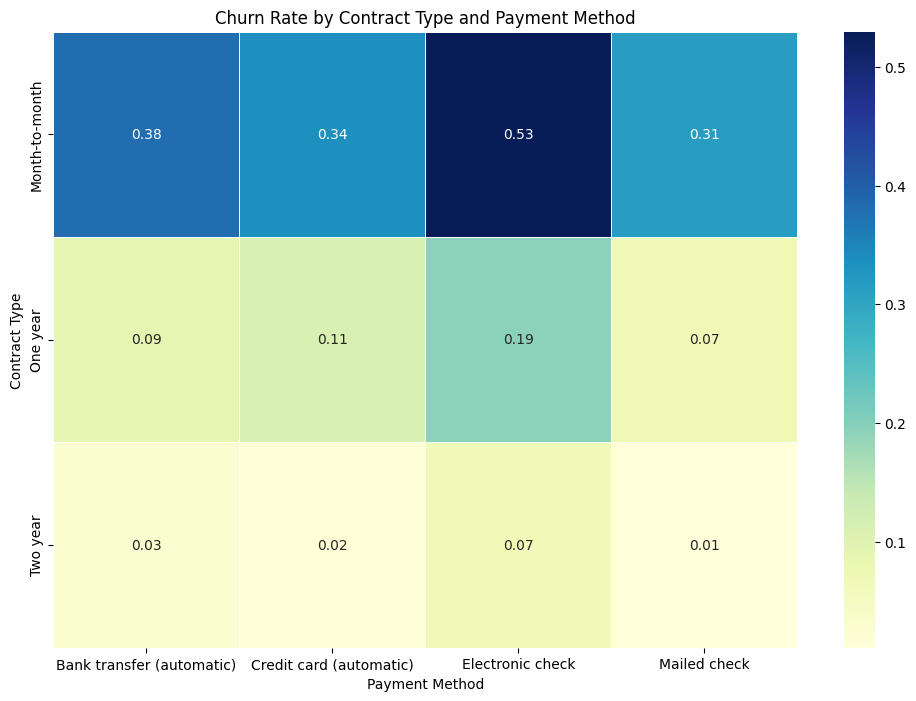

In [37]:
# Relationship between Contract Type, Payment Method, and Churn (Yes)
## Create a pivot table to calculate churn rate
contract_payment_churn = pd.pivot_table(voda_merged, values = 'Churn', index = 'Contract', columns = 'PaymentMethod', aggfunc = lambda x: (x == 'Yes').mean())

# Plotting the heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(contract_payment_churn, annot = True, fmt=".2f", cmap= "YlGnBu", linewidths = .5)
plt.title('Churn Rate by Contract Type and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Contract Type')
plt.show()

##### 2.4 **Analytical Questions with visualizations** 

- 2.4.1 How does the distribution of contract types (month-to-month, one year, two years) affect the overall churn rate?

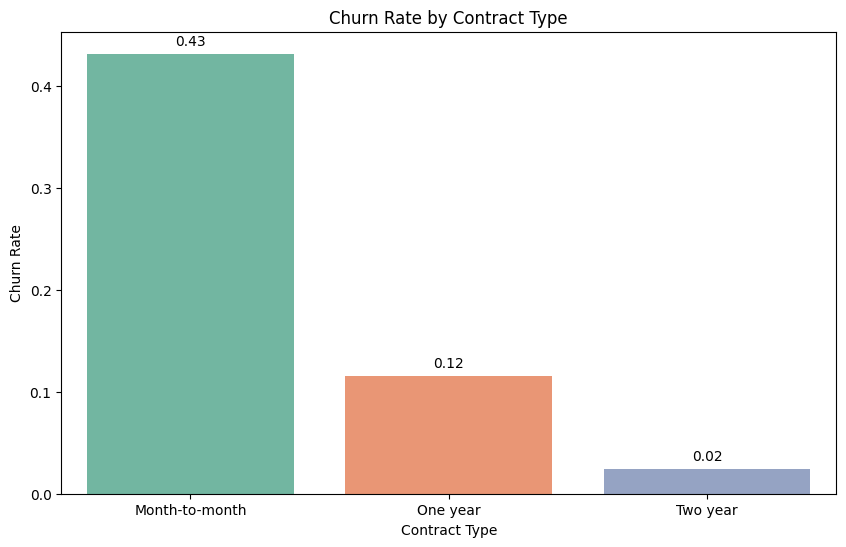

In [38]:
# Calculate the churn rate for each contract type
churn_rate1 = voda_merged.groupby('Contract')['Churn'].value_counts(normalize = True).unstack().reset_index()
churn_rate1['Churn Rate'] = churn_rate1['Yes'] / (churn_rate1['Yes'] + churn_rate1['No'])

plt.figure(figsize = (10, 6))
barplot = sns.barplot(x = 'Contract', y = 'Churn Rate', data = churn_rate1, palette = 'Set2')

# Annotate each bar with the churn rate value
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(format(height, '.2f'), 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

- 2.4.2 Is there a pattern in churn rate based on customer tenure? Are there specific points in the customer lifecycle where churn is more likely?

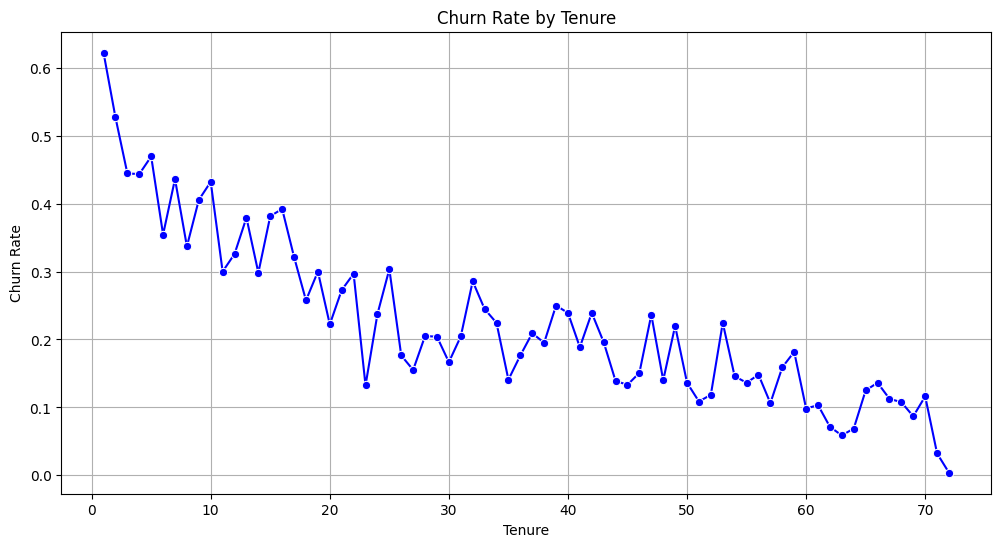

In [39]:
# Calculate churn rate by tenure
tenure_churn1 = voda_merged.groupby('Tenure')['Churn'].value_counts(normalize = True).unstack().reset_index()
tenure_churn1['Churn Rate'] = tenure_churn1['Yes'] / (tenure_churn1['Yes'] + tenure_churn1['No'])

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Tenure', y = 'Churn Rate', data = tenure_churn1, marker = 'o', color = 'b')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

- 2.4.3 Do customers with higher monthly charges tend to churn more often? Are there any specific thresholds where churn increases significantly?

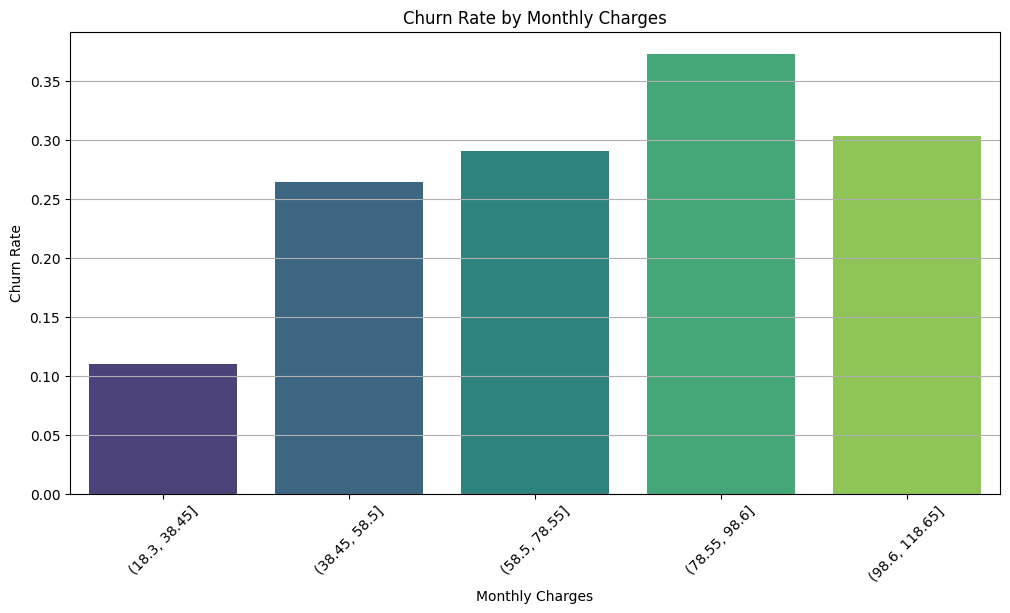

In [40]:
# Create bins for monthly charges
voda_merged['MonthlyChargesBin'] = pd.cut(voda_merged['MonthlyCharges'], bins = 5)

# Calculate churn rate by monthly charges bin
monthly_charges_bin_churn = voda_merged.groupby('MonthlyChargesBin')['Churn'].value_counts(normalize = True).unstack().reset_index()
monthly_charges_bin_churn['Churn Rate'] = monthly_charges_bin_churn['Yes'] / (monthly_charges_bin_churn['Yes'] + monthly_charges_bin_churn['No'])

plt.figure(figsize = (12, 6))
sns.barplot(x = 'MonthlyChargesBin', y = 'Churn Rate', data = monthly_charges_bin_churn, palette = 'viridis')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- 2.4.4 Does the preferred payment method influence churn rate? Are certain payment methods associated with higher churn?

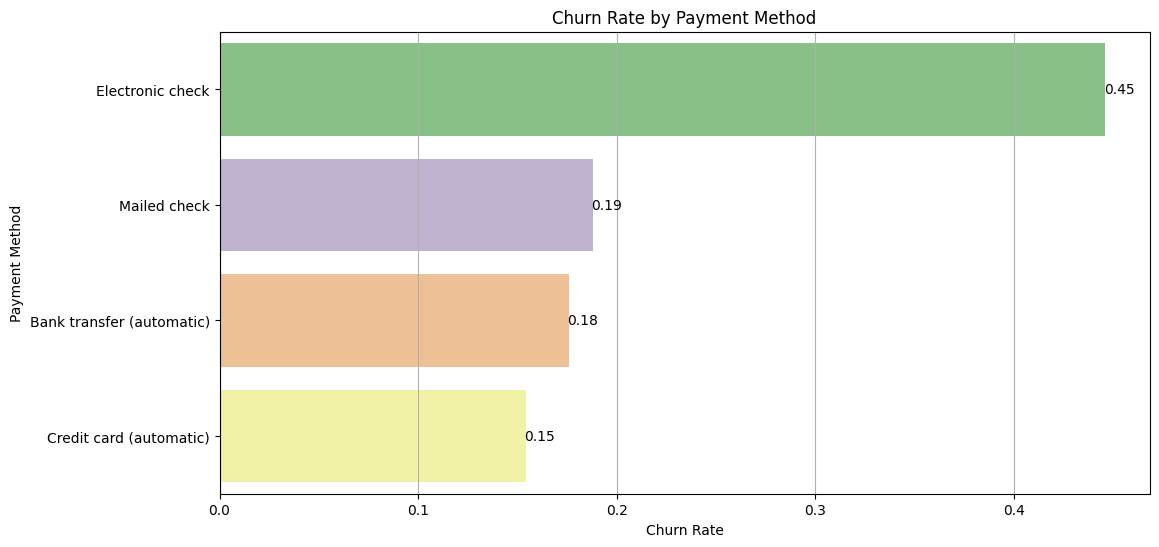

In [41]:
# Calculate churn rate by payment method
payment_method_churn = voda_merged.groupby('PaymentMethod')['Churn'].value_counts(normalize = True).unstack().reset_index()
payment_method_churn['Churn Rate'] = payment_method_churn['Yes'] / (payment_method_churn['Yes'] + payment_method_churn['No'])

# Sort by churn rate
payment_method_churn = payment_method_churn.sort_values(by = 'Churn Rate', ascending = False)

# Plotting the churn rate for each payment method
plt.figure(figsize = (12, 6))
barplot = sns.barplot(x = 'Churn Rate', y = 'PaymentMethod', data = payment_method_churn, palette = "Accent")
plt.title('Churn Rate by Payment Method')
plt.xlabel('Churn Rate')
plt.ylabel('Payment Method')
plt.grid(axis = 'x')

# Add values on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha = 'center', va = 'center', 
                     xytext = (10, 0), 
                     textcoords = 'offset points')

plt.show()

- 2.4.5 Are there demographic factors (like gender, senior citizen status, having a partner, or having dependents) that correlate with higher churn rates?

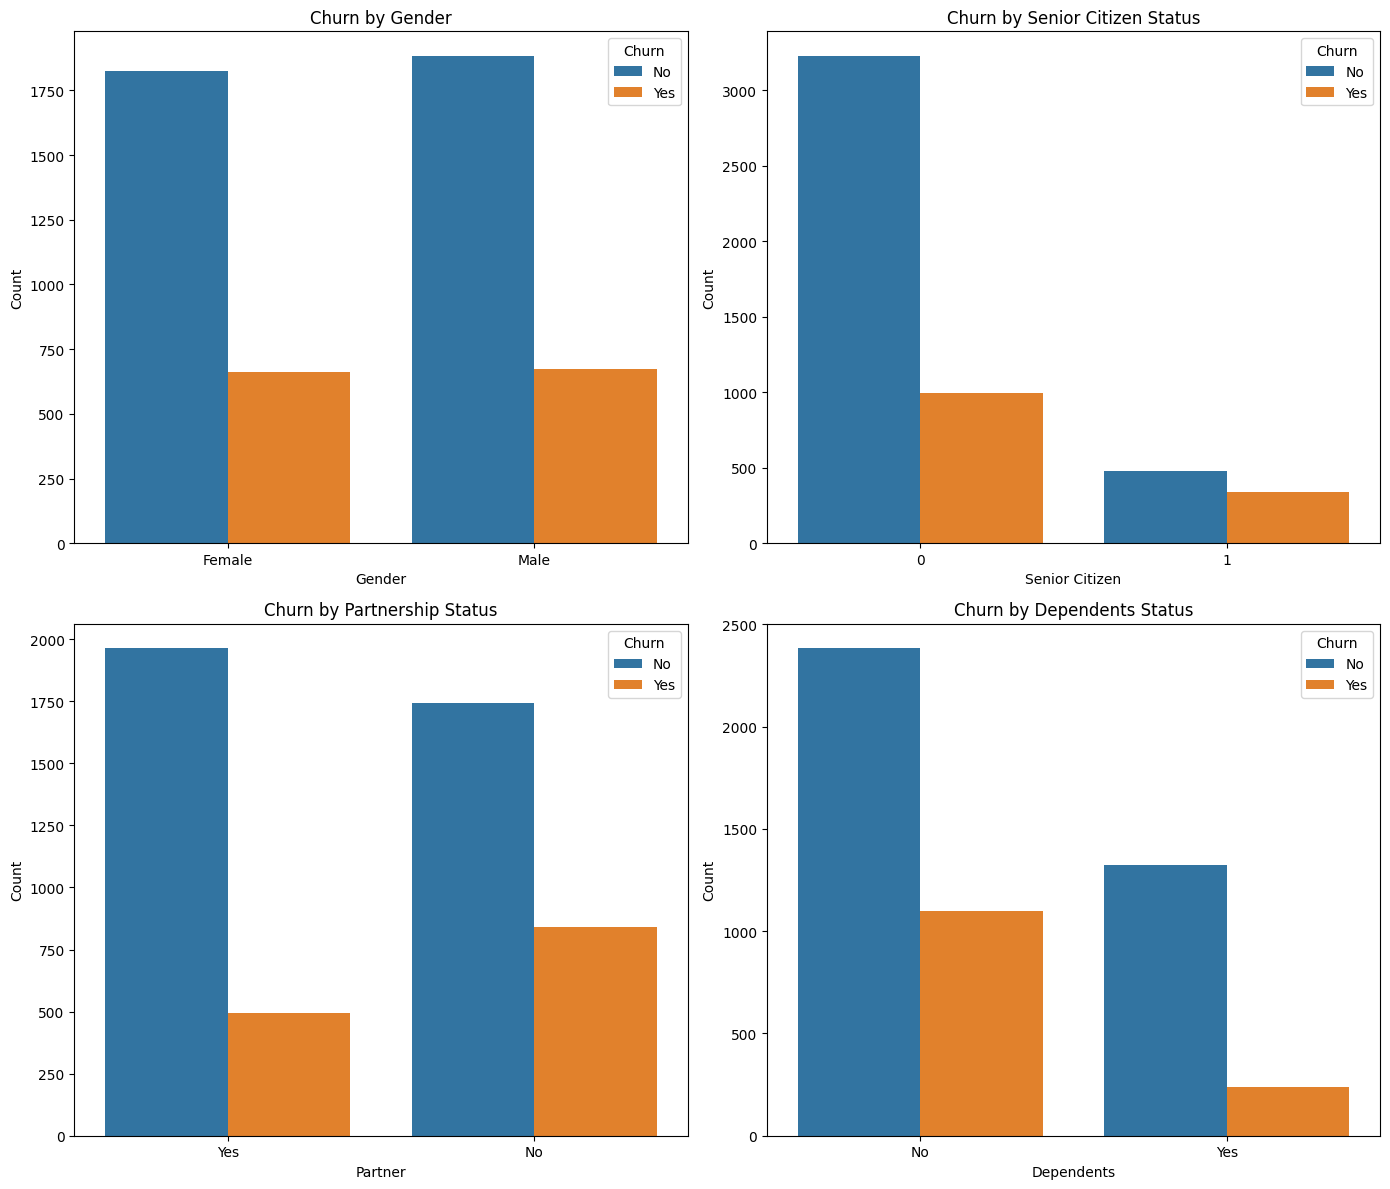

In [42]:
# Create a subplot for each demographic characteristic
# Set up the matplotlib figure
plt.figure(figsize = (14, 12))

# Churn by Gender
plt.subplot(2, 2, 1)
sns.countplot(x = 'Gender', hue = 'Churn', data = voda_merged)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Churn by Senior Citizen Status
plt.subplot(2, 2, 2)
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = voda_merged)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Churn by Partnership Status
plt.subplot(2, 2, 3)
sns.countplot(x = 'Partner', hue = 'Churn', data = voda_merged)
plt.title('Churn by Partnership Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn')
 
 
# Churn by Dependents Status
plt.subplot(2, 2, 4)
sns.countplot(x = 'Dependents', hue = 'Churn', data = voda_merged)
plt.title('Churn by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
 
plt.tight_layout()
plt.show()

##### 2.5 **Hypothesis Testing**

- 2.5.1 **Null Hypothesis(H0):** There is no significant relationship between customer churn and contract type, tenure, and monthly charges.

- 2.5.2 **Alternative Hypothesis(H1):** There is a significant relationship between customer churn and contract type, tenure, and monthly charges.

In [43]:
# Contract type being a categorical variable, I would using the Cramer's V test to measure the association between Contract type and Churn

# Create a contingency table
contingency_table = pd.crosstab(voda_merged['Contract'], voda_merged['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
phi2 = chi2/n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

print(f"Cramér's V: {cramers_v}")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degree of Freedom:", dof)

if p < 0.05:
    print("Reject the null hypothesis. There is a significant association between Contract type and Churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Contract type and Churn.")

Cramér's V: 0.41822694914961495
Chi-square statistic: 882.0901975577578
p-value: 2.86119415951209e-192
Degree of Freedom: 2
Reject the null hypothesis. There is a significant association between Contract type and Churn.


In [44]:
# Using the Mann-Whitney U Statistic test to determine the relationship between Churn and Tenure and Monthly Charges

# Split data based on 
churn_yes = voda_merged[voda_merged['Churn'] == 'Yes']
churn_no = voda_merged[voda_merged['Churn'] == 'No']

# Perform Mann-Whitney U test
def mann_whitney_test(column):
    stat, p = mannwhitneyu(churn_yes[column], churn_no[column])
    return stat, p

for column in ['MonthlyCharges', 'Tenure']:
    stat, p = mann_whitney_test(column)
    print(f"{column}: Mann-Whitney U Statistic = {stat}, p-value = {p}")

    if p < 0.05:
        print(f"Reject the null hypothesis for {column}. There is a significant difference between Churn and Non-Churn groups.\n")
    else:
        print(f"Fail to reject the null hypothesis for {column}. There is no significant difference between Churn and Non-Churn groups.\n")



MonthlyCharges: Mann-Whitney U Statistic = 3100828.0, p-value = 1.1882857775801696e-42
Reject the null hypothesis for MonthlyCharges. There is a significant difference between Churn and Non-Churn groups.

Tenure: Mann-Whitney U Statistic = 1292899.5, p-value = 1.859353811918033e-148
Reject the null hypothesis for Tenure. There is a significant difference between Churn and Non-Churn groups.



##### 2.6 **Key Insights**

##### Data Cleaning
1. Some column names were not proper types (customerID, gender, and tenure). Rename them for consistency purposes.

2. Missing values noticed were all in the voda1 dataset. Below is a breakdown:
- MultipleLines     269 null values
- OnlineSecurity    651 null values
- OnlineBackup      651 null values
- DeviceProtection  651 null values
- TechSupport       651 null values
- StreamingTV       651 null values
- StreamingMovies   651 null values
- TotalCharges      5 null values
- Churn             1 null value

3. Datatypes and row values for some fields in both datasets were not consistent.
- The TotalCharges field in the voda1 dataset is of object dtype. This needs to be converted to float dtype.
- The MonthlyCharges and TotalCharges in voda2 dataset were rounded up to 2 decimal places.
- The Churn field in voda 1 dataset was changed from object dtype (True or False) to object dtype (Yes or No).
- The Partner, Dependents, PhoneService, and PaperlessBilling in the voda1 dataset were changed to object dtypes (Yes or No) from bool dtypes.
- Values in the MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies in the voda1 dataset were changed from True, False, and None to Yes, No, and No phone/internet service for consistency with values in each of the fields in voda2 dataset.

4. All missing values in voda1 dataset were replaced "No phone service" and "No internet service" for the applicable fields before mergingbefore merging 

5. No duplicated values found in the merged dataset

##### Univariate Analysis on Categorical Variables
- **Gender**: Nearly evenly split between males and females, with males slightly more prevalent. This suggests that gender-specific targeting may not be necessary for churn prevention strategies.

- **Senior Citizen**: Only about `16.2%` of the customers are senior citizens, which could be a niche market to explore for specific services or retention strategies.

- **Partner and Dependents**: A slight majority do not have a partner `51%` or dependents `69%`. This could indicate that single, independent individuals may be a significant demographic, possibly with different needs or usage patterns.

- **Phone Service**: Almost `90% `of customers have phone service, indicating a saturation of this service and possibly lower churn risk here compared to other services.

- **Multiple Lines**: The majority do not have multiple lines `53%`, but there's a significant portion that does, suggesting varied needs in communication services.

- **Internet Service**: Fiber optic is the most common type of internet service `45%`, followed by DSL. The popularity of fiber optic could indicate a demand for high-speed internet but may also highlight issues like higher costs or service satisfaction affecting churn.

- **Online Security, Online Backup, Device Protection, Tech Support**: Most customers do not subscribe to these services. This could point to potential areas for increasing service uptake and reducing churn by bundling these value-added services.

- **Streaming TV and Streaming Movies**: Slightly more customers have streaming movies than TV. This might suggest a preference or trend towards movie streaming, which could be leveraged in service packages.

- **Contract**: More than half of the customers are on a month-to-month contract, associated with higher churn rates. This is a critical area to focus on for retention strategies, possibly by encouraging longer contract terms.

- **Paperless Billing**: About `59%` use paperless billing, indicating a significant shift towards digital solutions.

- **Payment Method**: The most common payment method is electronic check `34%`, which could be correlated with churn, suggesting a review of payment options might influence customer satisfaction and retention.

##### Univariate Analysis on Numerical Variables
- **Tenure**: Ranges from `0` to `72` months, with an average of about `32.5` months. Longer tenure correlates strongly with lower churn, indicating the importance of focusing retention strategies on newer customers.

- **Monthly Charges**: Average monthly charges are about `$65.09`, but range widely from `$18.4` to `$118.65`, suggesting diverse service plans and possibly different price sensitivities among customers.

- **Total Charges**: Reflects the total amount spent by customers over time and varies widely, suggesting differing levels of customer engagement and investment in the services.

##### Bivariate Analysis
**Churn by Contract Type**
- Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts. This suggests that customers on short-term commitments feel less bound and possibly less satisfied, leading to higher churn rates.  

**Churn by Payment Method**
- The method of payment also seems to influence churn, with electronic checks showing a higher churn rate. This might be due to the demographics or the convenience factors associated with this payment method.  

**Churn by Internet Service**
- Customers with fiber optic services show a higher churn rate compared to those with DSL. This might reflect issues like cost or service expectations not being met with the higher-speed option.

**Churn by Streaming TV**
- Customers who subscribe to streaming TV services have slightly higher churn rates, particularly those without the service. This might suggest that value-added services like streaming could either be a retention tool or a point of dissatisfaction if not handled correctly.

**Churn by Multiple Lines**
- There isn't a stark difference in churn rates based on whether customers have multiple lines or not, suggesting that simply having multiple lines isn't a deciding factor for churn.

**Churn by Online Security**
- Online Security as an important service for retention, customers without online security show higher churn rates when compared to customer with online security. Likewise, customers without online security are more like to stay with the brand when compared with customers with online security. This suggests that better orientation of the importance of Online security and customer support, customer retention will appreciate.  

##### Multivariate Analysis

##### Analytical Questions Insights
- **Churn Rate by Contract type**: The Churn rate by contract type shows that customers on the monthly contract type will churn by `43%` while for customers on a year and two years contracts will churn by `12%` and `2%` respectively.

- **Churn Rate by Tenure**: The likelihood of customers who has surbscribed to the company's services with 1 - 19 months to churn is within `30%` to `65%` while customers who have stayed above the 19 months threshold stated above are likely to churn at a rate of less than `30%`.

- **Churn Rate by Monthly Charges**: Customers within the monthly charge rates of $78.55 - $98.60 are likely to churn when compared with other value ranges with a percentage churn rate of above `35%`.

- **Churn Rate by Payment Method**: Customers who make payment via the `Electronic Check` method are with the highest churn rate of `45%`.

- **Churn Rate by Demographic Factors**:

    1. Gender: Both Genders have almost the same Churn count and it is obvious from the chart that they are more of loyal customers within them when compared to those that will churn.

    2. Senior Citizen: Most of the customers with `No Senior Citizen` status are likely not going to churn. Same applies to customers with the Senior Citizen status though the Churn count between Churn and Not Churn is quite close.

    3. Partnership Status: Customers with or without partners are likely not to churn though, the Churn count for customers with `No Partner` is more when compared to the Churn count of customers with Partners.

    4. Dependent Status: The likelihood of Customers with or without dependents to not Churn is high when comparing the Churn and Not Churn counts of both categories. Though, the Churn count for customers with no dependents is more when compared to that of customers with dependents.

##### Hypothesis Testing
- **Categorical Value vs Categorical Value**: A Cramér's V value of `0.418` and p-value of `2.86e-192` suggests a `relatively strong association` between the contract type and churn. This means that the contract type has a significant impact on whether a customer will churn or not.

- **Numerical Values vs Categorical Values**: 
1. The p-value for the Mann-Whitney U test comparing Monthly Charges between the Churn and Non-Churn groups is extremely low (much less than 0.05). Therefore, we reject the null hypothesis. This indicates a significant difference in Monthly Charges between customers who churn and those who do not.

2. The p-value for the Mann-Whitney U test comparing Tenure between the Churn and Non-Churn groups is extremely low (much less than 0.05). Therefore, we reject the null hypothesis. This indicates a significant difference in Tenure between customers who churn and those who do not.

This denotes that both the Monthly Charges and Tenure variables show a significant difference between customers who churn and those who do not, suggesting that these factors are important in understanding customer churn behavior.

### 3. `Data Preparation`

##### 3.1 **Data Split into X and y**

In [46]:
# Drop columns not needed for modelling
voda_train = voda_merged.drop(['CustomerID', 'MonthlyChargesBin'], axis = 1)
voda_train.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# Drop my Target field
X = voda_train.drop('Churn', axis = 1)
X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [48]:
y = voda_train['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
y.unique()

array([0, 1], dtype=int64)

In [50]:
X.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [51]:
# Checking for categorical columns in the prediction features
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [52]:
# Checking for numerical columns in the prediction features
numerical_columns = X.select_dtypes('number').columns
numerical_columns

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [54]:
X.select_dtypes('number').skew()

SeniorCitizen     1.831228
Tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.946284
dtype: float64

##### 3.2 **Creating a Pipeline**

In [57]:
numeric_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', RobustScaler()),
    ('power-transformation', PowerTransformer(method = 'yeo-johnson'))
])
categorical_pipeline = Pipeline(steps = [
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])
preprocessor= ColumnTransformer(transformers = [
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])


# Applying preprocessing to the data
X = preprocessor.fit_transform(X)

##### 3.3 **Dataset Split into training and testing**

In [58]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# X contains features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.2, random_state = 42, stratify = y_train_resampled)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_eval shape:", y_test.shape)

X_train shape: (5931, 38)
X_test shape: (1483, 38)
y_train shape: (5931,)
y_eval shape: (1483,)


In [59]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('power-transformation',
                                                  PowerTransformer())]),
                                 Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [61]:
# Label encoding the y variable
encoder = LabelEncoder()
y_train_encoder = encoder.fit_transform(y_train)
y_test_encoder = encoder.transform(y_test)

### 4. `Modeling & Evaluation`

##### 4.1 Modelling

In [62]:
# Defining the models
models = {
    'random_forest': RandomForestClassifier(random_state = 42),
    'logistic_regression': LogisticRegression(max_iter = 1000, random_state = 42),
    'gradient_boosting': GradientBoostingClassifier(random_state = 42),
    'decision_tree': DecisionTreeClassifier(random_state = 42),
    'ada_boost': AdaBoostClassifier(random_state = 42),
    'svc': SVC(random_state = 42)
}

In [63]:
# Initializing KFold cross-validation with 5 folds
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [64]:
# Model Selection with HalvingGridSearchCV
grid_searches = {}
for model_name, model in models.items():
    pipeline = Pipeline(
        steps = [
               ('model', model)
               ])
 
    # Halving Grid Search with Automatic Resource Detection
    grid_search = HalvingGridSearchCV(pipeline, {}, cv = kf, factor = 2, scoring = 'accuracy', n_jobs = -1)
 
    # Fitting the model
    grid_search.fit(X_train, y_train)
    grid_searches[model_name] = grid_search

In [67]:
# Model Pipeline Structures
def display_pipelines(grid_searches, models_per_row = 2):
    all_pipelines_html = "<div style='display: flex; flex-wrap: wrap;'>"
    for i, (model_name, grid_search) in enumerate(grid_searches.items()):
        all_pipelines_html += f"<div style='flex: 1 1 {50/models_per_row}%; margin: 10px;'> "
        all_pipelines_html += f"<h3>Pipeline Diagram for {model_name}:</h3>\n"
        all_pipelines_html += estimator_html_repr(grid_search.best_estimator_)
        all_pipelines_html += "</div>"  
        if (i + 1) % models_per_row == 0:
            all_pipelines_html += "<div style='clear: both;'></div>"
    all_pipelines_html += "</div>"  
    display(HTML(all_pipelines_html))
 
display_pipelines(grid_searches)

In [69]:
# Initializing a dictionary to hold evaluation metrics
evaluation_results = {}
 
# Evaluating each model on the validation set
for model_name, grid_search in grid_searches.items():
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(
        grid_search.best_estimator_, "predict_proba") else None
 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average = 'binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
 
    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'auc': auc
    }
 
voda_scores = pd.DataFrame(evaluation_results).transpose()
voda_scores_sorted = voda_scores.sort_values(by = "accuracy", ascending = False)
 
print("Model Evaluation Scores:")
voda_scores_sorted

Model Evaluation Scores:


,accuracy,precision,recall,confusion_matrix,auc
random_forest,0.857047,0.845752,0.873144,"[[624, 118], [94, 647]]",0.925932
gradient_boosting,0.848281,0.83162,0.873144,"[[611, 131], [94, 647]]",0.928581
ada_boost,0.815239,0.784409,0.869096,"[[565, 177], [97, 644]]",0.899684
svc,0.798382,0.779747,0.831309,"[[568, 174], [125, 616]]",None
decision_tree,0.790964,0.786189,0.79892,"[[581, 161], [149, 592]]",0.791609
logistic_regression,0.776129,0.756587,0.813765,"[[548, 194], [138, 603]]",0.848025


##### 4.2 Metrics Breakdown

- **Accuracy**: This metric represents the overall percentage of correct predictions made by the model. Here, Random Forest has the highest accuracy `85.7%`, followed by Gradient Boosting `84.8%`.

- **Precision**: This metric displays the proportion of positive predictions that are actually correct. For example, a precision of `85%` for the positive class means that out of every 100 predictions the model makes as positive, 85 are actually positive. Here, Random Forest again has the highest precision `84.6%`.

- **Recall:** This metric shows the proportion of actual positive cases that the model correctly identified. A recall of `87%` for the positive class means that out of every 100 actual positive cases, the model identified 87 of them correctly. Here, Random Forest and AdaBoost are tied for the highest recall `87.3%`.

- **AUC (Area Under the ROC Curve)**: This metric applies to binary classification problems and summarizes the model's ability to distinguish between positive and negative classes. A higher AUC indicates better performance. Here, Gradient Boosting has the highest AUC `92.9%` followed by Random Forest `92.6%`. Note that SVC (Support Vector Machine) doesn't have an AUC score reported, possibly because the library I used doesn't calculate it by default for this model type.

##### 4.3 Best 2 Models

- **Choosing the Best Model**: Based on these metrics stated above, 

    1. Random Forest appears to be the best performing model overall. It has the highest accuracy, good precision, and high recall.

    2. Gradient Boosting is a close second, with slightly lower accuracy but the highest AUC.

##### 4.4 Confusion Matrices

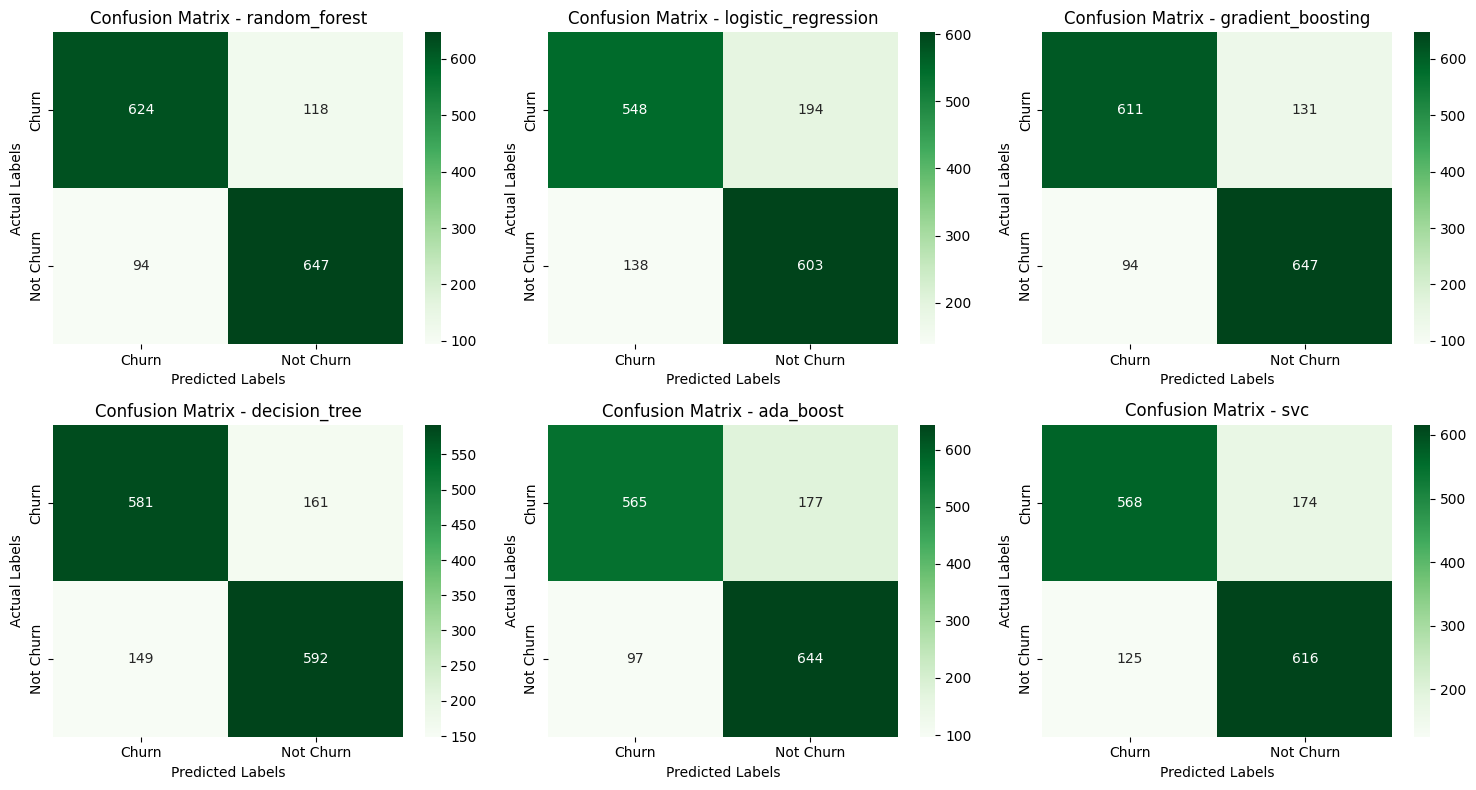

In [71]:
def plot_confusion_matrices(voda_scores, figsize = (15, 8), ncols = 3):
    nrows = int(np.ceil(len(voda_scores.columns) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
    for i, (model_name, row) in enumerate(voda_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        ax = axes.flat[i]
        sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = 'Greens',
                    xticklabels = ['Churn', 'Not Churn'], yticklabels = ['Churn', 'Not Churn'], ax = ax)
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('Actual Labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    if nrows > 1 and ncols > 1:  
        plt.tight_layout()
    plt.show()
 
plot_confusion_matrices(voda_scores)

##### 4.5 ROC Curves

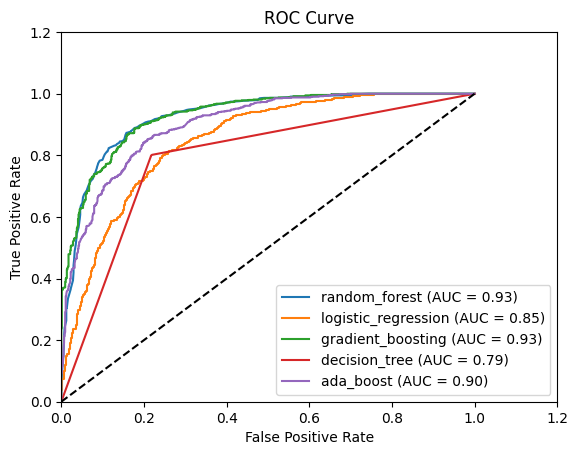

In [80]:
# ROC curve for each model
import matplotlib.pyplot as plt  # Assuming plt is already imported

for model_name, grid_search in grid_searches.items():
    if evaluation_results[model_name]['auc'] is not None:
        fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label = f"{model_name} (AUC = {evaluation_results[model_name]['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Dashed black line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')  # Add legend to show labels for each curve

# Additional customization (optional)
plt.xlim([0.0, 1.2])  # Set x-axis limits from 0 to 1.2
plt.ylim([0.0, 1.2])  # Set y-axis limits from 0 to 1.2
plt.show()  

##### 4.6 Hyperparameter Tuning

In [81]:
# Define models and parameter grids
best_models = {
    'random_forest': RandomForestClassifier(random_state = 42),
    'gradient_boosting': GradientBoostingClassifier(random_state = 42),
}
 
param_grid = {
    'random_forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5]
    },
    'gradient_boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
}
 
tuned_grid_searches = {}
 

for best_model_name, model in best_models.items():
    pipeline = Pipeline(steps = [('model', model)])
    tuned_grid_search = GridSearchCV(
        pipeline, param_grid[best_model_name], cv = 5, n_jobs = -1, scoring = 'accuracy')
 
    tuned_grid_search.fit(X_train, y_train)
    tuned_grid_searches[best_model_name] = tuned_grid_search
 

In [84]:
# Assuming you have your models in grid_searches and evaluation_results
# Initialize the tuned_evaluation_results dictionary
tuned_evaluation_results = {}

# Evaluate each model on the test set and store the results
for model_name, grid_search in grid_searches.items():
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(grid_search.best_estimator_, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else None
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Ensure the model_name key is initialized in the dictionary
    tuned_evaluation_results[model_name] = tuned_evaluation_results.get(model_name, {})
    
    # Update the evaluation results for the current model
    tuned_evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'logloss': logloss,
        'auc': auc
    }

# Convert the results to a DataFrame for easier visualization
tuned_voda_scores = pd.DataFrame(tuned_evaluation_results).transpose()

# Display the DataFrame
tuned_voda_scores

,accuracy,precision,recall,f1_score,logloss,auc
random_forest,0.857047,0.845752,0.873144,0.859230,0.348306,0.925932
logistic_regression,0.776129,0.756587,0.813765,0.784135,0.478400,0.848025
gradient_boosting,0.848281,0.831620,0.873144,0.851876,0.348084,0.928581
decision_tree,0.790964,0.786189,0.798920,0.792503,7.487946,0.791609
ada_boost,0.815239,0.784409,0.869096,0.824584,0.676907,0.899684
svc,0.798382,0.779747,0.831309,0.804703,NaN,NaN


- 4.6.1 Best 2 Models after Hyperparameter Tuning

Based on the evaluation results above, the best models in terms of performance metrics are:

1. Gradient Boosting Classifier:

    - High accuracy: 0.848281
    - High precision: 0.831620
    - High recall: 0.873144
    - High F1 score: 0.851876
    - High AUC: 0.928581 (best among all models)

2. Random Forest Classifier:

    - High accuracy: 0.857047
    - High precision: 0.845752
    - High recall: 0.873144
    - High F1 score: 0.859230
    - High AUC: 0.925932 (second best after Gradient Boosting)

Both of these models have strong metrics across the board, but the Gradient Boosting Classifier has the highest AUC, which indicates it might be slightly better in distinguishing between classes.

##### 4.7 Exporting Key Components

In [86]:
# Ensure the directory exists
os.makedirs('Exports', exist_ok = True)
 
# Components to export
export_dict = {
    'preprocessing': {
        'preprocessor': preprocessor,
    },
    'tuned_models': tuned_grid_searches
}
 
# Serialize the object to a file
with open('Exports/churn_model_components.pkl', 'wb') as f:
    pickle.dump(export_dict, f)

In [87]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


##### 4.8 Test Prediction

In [91]:
# Loading the exported model components
with open('Exports/churn_model_components.pkl', 'rb') as f:
    exported_dict = pickle.load(f)
 
# Extract the components from the loaded dictionary
preprocessor = exported_dict['preprocessing']['preprocessor']
models = exported_dict['tuned_models']

# Preprocess the test data respectively
data_test_processed = preprocessor.transform(voda_test)

In [92]:
# Assuming merged_data and data_test are already defined and merged
churn_dataset = pd.concat([voda_merged, voda_test], axis = 0)

# Directory where you want to save the file
directory = 'Data'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file
churn_dataset.to_csv(f'{directory}/Churn_Dataset.csv', index = False)

##### 4.9 Model Persistence

- 4.9.1 Saving the Models

In [94]:
# Save the Gradient Boosting Classifier
joblib.dump(grid_searches['gradient_boosting'], 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [95]:
# Save the Random Forest Classifier
joblib.dump(grid_searches['random_forest'], 'random_forest_model.pkl')

['random_forest_model.pkl']

- 4.9.2 Loading the Models

In [98]:
# Load the Gradient Boosting Classifier
gradient_boosting_model = joblib.load('gradient_boosting_model.pkl')
print("Gradient Boosting Classifier loaded from 'gradient_boosting_model.pkl'")

Gradient Boosting Classifier loaded from 'gradient_boosting_model.pkl'


In [99]:
# Load the Random Forest Classifier
random_forest_model = joblib.load('random_forest_model.pkl')
print("Random Forest Classifier loaded from 'random_forest_model.pkl'")

Random Forest Classifier loaded from 'random_forest_model.pkl'


### `Deployment`

##### Not applicable in this project